<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_09_Data_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

# Feature Augmentation

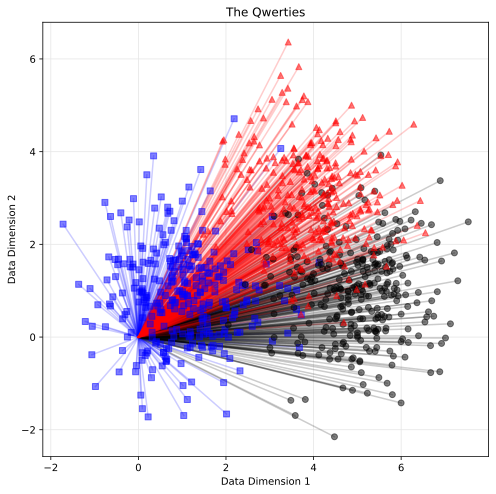

In [2]:
# Create the Qwerties Dataset

# Number of data points
nPerClust = 300
# define SDV
blur = 1

A = [1,1]
B = [5,1]
C = [4,3]

# Generate the data around these points
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]
c = [C[0] + np.random.randn(nPerClust)*blur, C[1] + np.random.randn(nPerClust)*blur]

data_np = np.hstack((a,b,c)).T

# Define the true labels
labels_np = np.hstack((np.zeros((nPerClust)),
                       np.ones((nPerClust)),
                       np.ones((nPerClust)) +1))

# Convert them into tensors
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long()

# PLot the whole thing
fig = plt.figure(figsize=(8,8))

# Draw the distances of every point to the origin
color = "bkr"
for i in range(len(data)):
    plt.plot([0,data[i,0]], [0,data[i,1]], color = color[labels[i]], alpha=0.2)

plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],"bs", alpha=0.5)
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],"ko", alpha=0.5)
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1],"r^", alpha=0.5)

plt.grid(color=[0.9,0.9,0.9])
plt.title("The Qwerties")
plt.xlabel("Data Dimension 1")
plt.ylabel("Data Dimension 2")
plt.show()

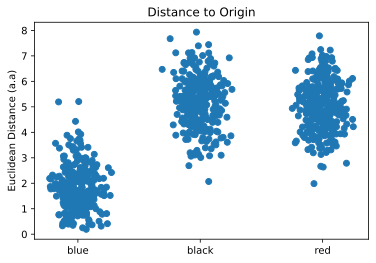

In [3]:
# Compute the euclidean distance to the origin for each data point
dist2origin = torch.sqrt(data[:,0]**2 + data[:,1]**2)

plt.plot(labels+torch.randn(900)/10, dist2origin, "o")
plt.xticks([0,1,2], labels=["blue", "black", "red"])
plt.ylabel("Euclidean Distance (a.a)")
plt.title("Distance to Origin")
plt.show()

In [4]:
# Add the euclidean distance data to the data matrix as a third dimension
# reshape the distance vector into a column vector to concatenate to the original data
dataAug = torch.cat((data, dist2origin.view(len(data),1)),axis=1)

# CHeck data sizes
print(data.shape)
print()
print(dataAug.shape)

torch.Size([900, 2])

torch.Size([900, 3])


In [5]:
# Take a look at the data created
dataAug

tensor([[3.2254, 1.1102, 3.4111],
        [0.0550, 1.9654, 1.9661],
        [1.0089, 0.9761, 1.4038],
        ...,
        [4.5191, 1.7769, 4.8558],
        [3.0845, 3.5541, 4.7059],
        [3.1242, 3.7631, 4.8910]])

In [6]:
# Use sikitlearn to split the data into train and test
train_data, test_data, train_labels, test_labels = train_test_split(dataAug, labels, test_size=0.1)

# Convert them to PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Translate into dataloader objects
batchsize = 16
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle = True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [ ]:
# Create the Model